**Engrega Final - Data Science 1**

**Sebastian Montenegro**


**Introduccion**

El sueño es un componente esencial del bienestar humano, estrechamente relacionado con la salud física, mental y el rendimiento diario. Factores como la edad, el nivel de estrés, la actividad física y el estilo de vida pueden influir significativamente en la duración y la calidad del sueño. Comprender estas relaciones permite diseñar intervenciones más efectivas para mejorar la salud.

Este análisis se centra en un conjunto de datos de salud y estilo de vida que relacionados con la calidad del sueño, incluye variables demográficas y biométricas para explorar cómo se relacionan con la duración del sueño, con el objetivo de predecirla y comprender sus principales determinantes.

**Hipótesis**

Existe una relación relevante entre variables de estilo de vida, como el nivel de actividad física, el estrés diario, frecuencia cardíaca y la duración del sueño. En particular, mayores niveles de estrés y menor actividad física se asocian con menor duración del sueño.

**Objetivo**

El objetivo de este proyecto es analizar y modelar la relación entre variables de estilo de vida y la duración del sueño, utilizando técnicas de regresión para predecir las horas de sueño de una persona a partir de sus características demográficas, biométricas y hábitos diarios. Además, se busca identificar los factores más importantes que afectan la duración del sueño para aportar evidencia que pueda ser utilizada en recomendaciones de salud y estilo de vida.

**Preguntas:**

¿Que cantidad de horas de sueño tiene cada profesional?

¿Cual es el rango de edades que mas predomina en conjunto de datos?

¿Que relacion existe entre la calidad del sueño y el indice de masa corporal?

¿Qué factores del estilo de vida son más relevantes para explicar la duración del sueño?

¿Cuánto influye el nivel de estrés en la duración del sueño?

¿La actividad física diaria predice bien la duración del sueño?

¿Existen diferencias significativas por edad o género en la duración del sueño?


In [38]:
# Importacion de librerias y carga de datos.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv", index_col= "Person ID")
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [39]:
# Busqueda de valores nulos

print(df.isnull().sum())

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [40]:
# En la caolumna "BMI Category"" estan las categorias "Normal" y "Normal Weight" que es practicamente lo mismo, por lo se usara .replace para dejarlas todas como "Normal Weight"

df['BMI Category'] = df['BMI Category'].replace('Normal', 'Normal Weight')

In [41]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


/tmp/ipython-input-42-1189456162.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


Text(0, 0.5, 'Horas de Sueño')

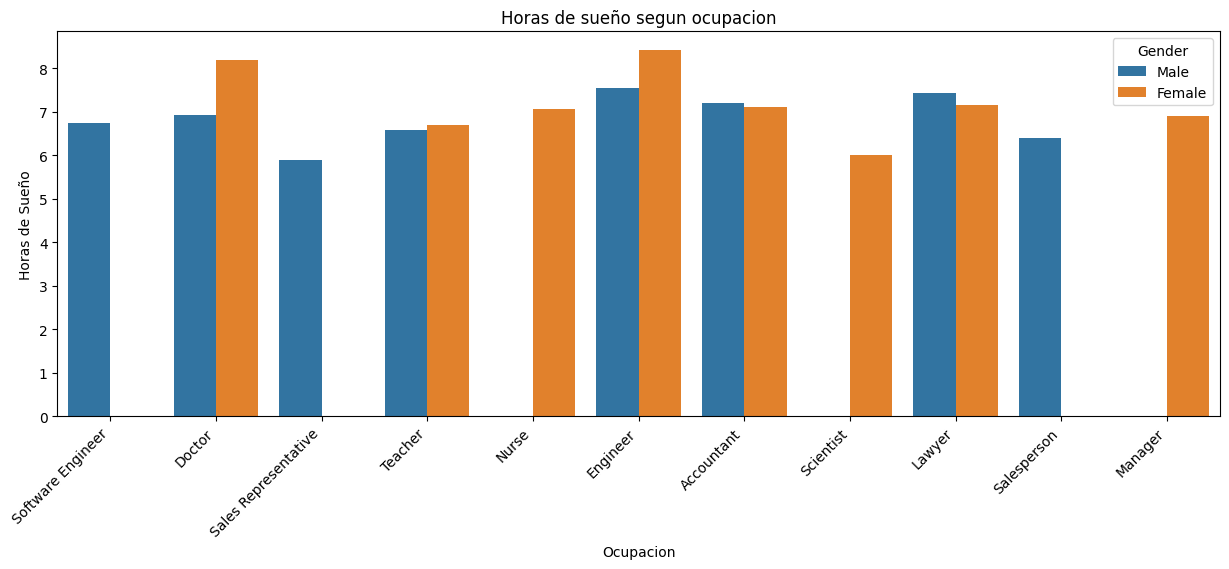

In [42]:
# Gráfico de barras

plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="Occupation", y="Sleep Duration", hue="Gender", errorbar=None)

# Personalizacion
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Horas de sueño segun ocupacion")
plt.xlabel("Ocupacion")
plt.ylabel("Horas de Sueño")


**Interpretacion del grafico de barras**

En este grafico se puede apreciar las horas de sueño segun la profesion de la persona, las mujeres "Scientist" y los hombres "Sales Representative" son los que menos horas de sueño presenta, mientras que las mujeres "Doctor" y "Engineer" son las mas horas de sueño tienen.

Text(0, 0.5, 'Frecuencia')

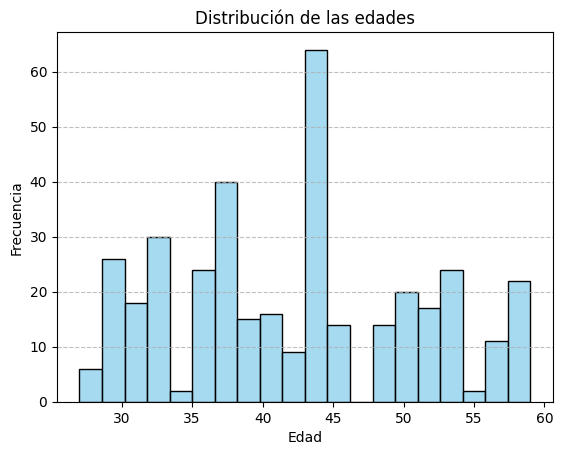

In [43]:
# Histograma

sns.histplot(df['Age'], bins=20, color="skyblue")
plt.grid(axis="y", linestyle="--", alpha=0.8)

# Personalizacion
plt.title("Distribución de las edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")


**Interpretacion del Histograma**

**Distribucion Simetrica**
Hay mas personas entre los 37 y 45 años de edad.

**Moda Aproximada:**
La edad mas frecuente son los 44 años.

**Dispercion:**
La edad va desde los 0 a los 60 años, la mayoria de las observaciones estan concentradas entre los 33 y los 44 años.

**Valores Bajos y Altos:**
Hay profesionales muy jovenes (25 a 30 años), tambien algunos mayores a los 55 años.

**Conclusion:**
El histograma muestra que el grupo mayoritario son profesionales adultos seguido de los mas jovenes y los mayores respectivamente.

Text(0.5, 1.0, 'Calidad del sueño en relacion al indice de masa corporal')

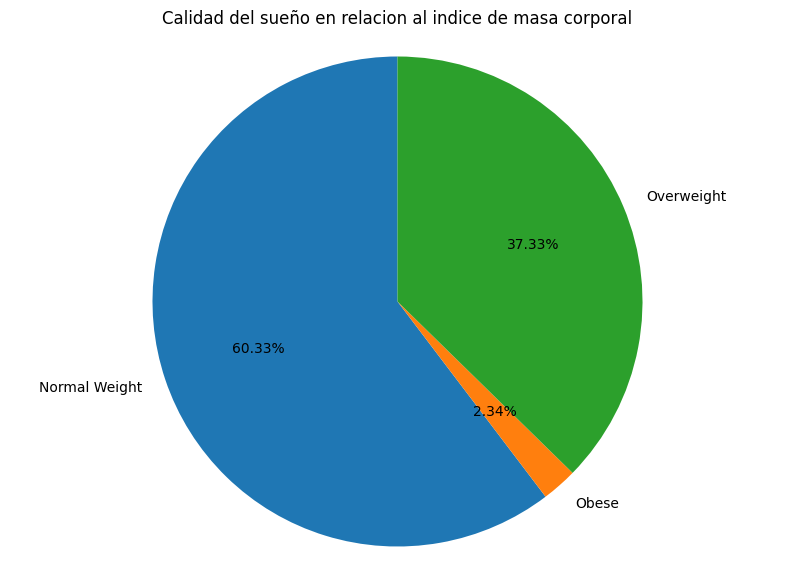

In [44]:
# Grafico Circular

fig, ax = plt.subplots(figsize=(10, 7))
df_agrupado = df.groupby('BMI Category')['Quality of Sleep'].sum()
df_valores = df_agrupado.values
estiquetas = df_agrupado.index

# Personalizacion
ax.pie(df_valores, labels=estiquetas, autopct='%1.2f%%', startangle=90)
ax.axis('equal')
plt.title('Calidad del sueño en relacion al indice de masa corporal')

**Interpretacion del grafico circular**

**Con este grafico podemos concluir que:**

-Las personas que tienen un indice de masa corporal normal son las que mejor calidad de sueño tienen.

-Las personas con sobrepeso tienen una calidad del sueño inferior en comparacion con los que tienen un peso normal.

-Las personas obesas son las que peor calidad de sueño tienen.

**K-Means Clustering**

In [45]:
# Feature Selection

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder


# Seleccionamos las variables numericas
features = ["Age","Sleep Duration",	"Quality of Sleep",	"Physical Activity Level","Stress Level","Heart Rate", "Daily Steps"]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

#Usamos KMeans Clustering
kmeans = KMeans(n_clusters=5)
df["segmento_pacientes"] = kmeans.fit_predict(X_scaled)

# Aplicar SelectKBest con 3 variables
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X_scaled, df["segmento_pacientes"])

# Ver qué variables fueron seleccionadas
selected_mask = selector.get_support()
selected_features = [f for f, s in zip(features, selected_mask) if s]
print("Variables seleccionadas:", selected_features)

Variables seleccionadas: ['Sleep Duration', 'Quality of Sleep', 'Stress Level']


In [46]:
# Selección de columnas categóricas
categoricas = ["Gender", "Occupation", "BMI Category"]

# One-hot encoding
df_dummies = pd.get_dummies(df[categoricas])

# Concatenar con las numéricas
X_total = pd.concat([df[["Age","Sleep Duration",	"Quality of Sleep",	"Physical Activity Level","Stress Level","Heart Rate", "Daily Steps"]],
                     df_dummies], axis=1)
# Normalizamos los valores
scaler = StandardScaler()
X_scaled_total = scaler.fit_transform(X_total)

# Aplicamos k-mean
kmeans = KMeans(n_clusters=5)
df["segmento_sueño"] = kmeans.fit_predict(X_scaled_total)


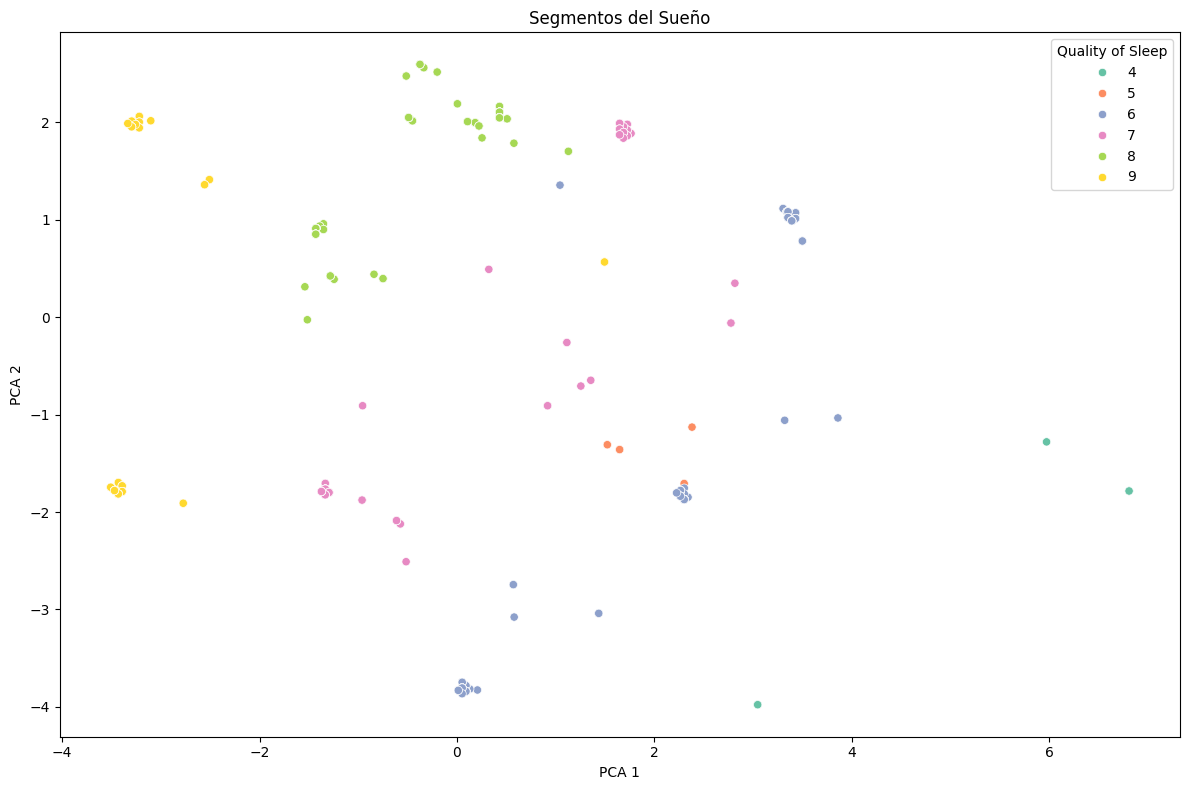

In [47]:
# Visualizamos y usamos PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_total)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Creamos el grafico
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Quality of Sleep", palette="Set2")
plt.title("Segmentos del Sueño")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Quality of Sleep")
plt.tight_layout()
plt.show()


Al utilizar K-Means todos los pacientes fueron agrupados segun su edad, duración del sueño, actividad física, etc.



**Modelo de Regresion Lineal**

In [48]:
#Separamos las columnas en categoricas y numericas

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Variables numéricas
columnas_num = ["Age","Sleep Duration", "Physical Activity Level","Stress Level","Heart Rate", "Daily Steps"]

# Variables categóricas
columnas_cat = ["Gender", "Occupation", "BMI Category"]


In [49]:
# Clasificacion
# Codificar variables categóricas con one-hot encoding
df_cod = pd.get_dummies(df[columnas_cat], drop_first=True)


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


# Variables numéricas y categóricas que realmente existen
columnas_num = ["Age","Sleep Duration",	"Physical Activity Level","Stress Level","Heart Rate", "Daily Steps"]
columnas_cat = ["Gender", "Occupation", "BMI Category"]

# Codificamos las categóricas
df_cod = pd.get_dummies(df[columnas_cat], drop_first=True)

# Escalamos las variables numéricas
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df[columnas_num]), columns=columnas_num, index=df.index)

# Combinamos los datos preparados
X = pd.concat([df_num, df_cod], axis=1)
y = df["Quality of Sleep"]

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificación de shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (299, 19)
y_train shape: (299,)


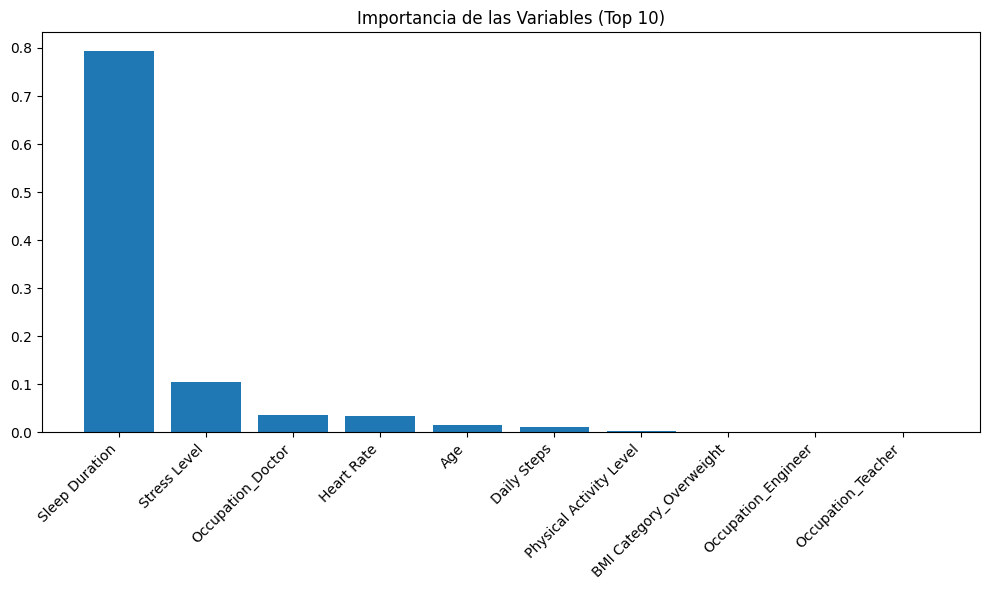

In [51]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Entrenamos un modelo rápido para medir importancia de variables
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Obtenemos importancias
importancias = model.feature_importances_
indices = np.argsort(importancias)[::-1]
nombres_features = X.columns[indices]

# Mostramos las 10 variables mas relevantes
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Variables (Top 10)")
plt.bar(range(10), importancias[indices][:10], align='center')
plt.xticks(range(10), nombres_features[:10], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Filtrar solo las 5 variables más importantes dentro del contexto de calidad de sueño
features_top = ["Sleep Duration", "Age", "Heart Rate", "Daily Steps", "Stress Level", "Physical Activity Level"]

X_train_sel = X_train[features_top]
X_test_sel = X_test[features_top]

# Entrenamos modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train_sel, y_train)

# Predicciones
y_pred = modelo.predict(X_test_sel)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo:")
print(f"MAE (Error absoluto medio): {mae:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.2%}")



Evaluación del modelo:
MAE (Error absoluto medio): 0.29
RMSE (Raíz del error cuadrático medio): 0.36
R² (Coeficiente de determinación): 91.55%


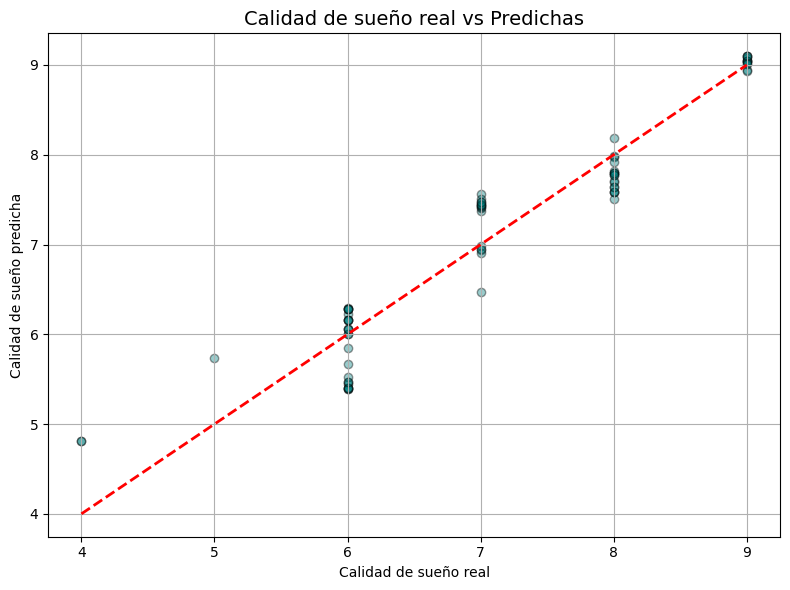

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='teal', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Calidad de sueño real vs Predichas', fontsize=14)
plt.xlabel('Calidad de sueño real')
plt.ylabel('Calidad de sueño predicha')
plt.grid(True)
plt.tight_layout()
plt.show()


MAE: En promedio, las predicciones se desvían 0.29 unidades de la realidad.
como estmos prediciendo Sleep Duration (en hrs), significa que en promedio el modelo se equivoca por unos 17 minutos (0.29 horas = 17 min).

RMSE: 0.36 horas = 22 minutos de sueño.

R²: El 91.55% de la varianza en Sleep Duration se explica por el modelo.

Concluison Tecnica: El modelo de regresión lineal puede predecir la duración del sueño con un error promedio de 17 minutos y explica aproximadamente el 92% de la variabilidad en los datos.




In [54]:
from xgboost import XGBRegressor

modelo_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
modelo_xgb.fit(X_train_sel, y_train)
y_pred_xgb = modelo_xgb.predict(X_test_sel)

# Evaluar
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Modelo XGBoost")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R²: {r2_xgb:.2%}")


Modelo XGBoost
MAE: 0.03
RMSE: 0.16
R²: 98.32%


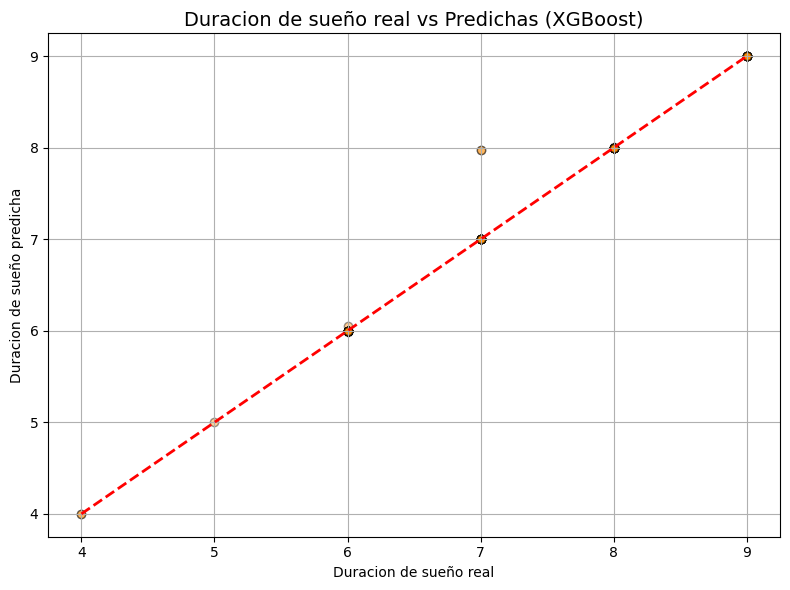

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.4, color='darkorange', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Duracion de sueño real vs Predichas (XGBoost)', fontsize=14)
plt.xlabel('Duracion de sueño real')
plt.ylabel('Duracion de sueño predicha')
plt.grid(True)
plt.tight_layout()
plt.show()


MAE: El mae es de 0.03 lo que significa que en promedio hay 1.8 minutos.

RMSE: El valor es de 0.16, lo que indica que hay menos errores y equivaldria a 9.6 minutos de sueño

R²: El valor corresponde a 98.32$, lo que indica que existe mas varianza en comparacion con el modelo anterior

Concluison Tecnica: El modelo XGBoost predice la duración del sueño con un error promedio de solo 2 minutos, lo que es muy preciso. Ademas, explica más del 98% de las diferencias en los datos de sueño

